# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [3]:
!pip install scikit-learn yellowbrick


  Using cached scikit_learn-1.6.1-cp39-cp39-win_amd64.whl.metadata (15 kB)
  Using cached yellowbrick-1.5-py3-none-any.whl.metadata (7.7 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.2 MB ? eta -:--:--
    --------------------------------------- 0.3/11.2 MB ? eta -:--:--
    --------------------------------------- 0.3/11.2 MB ? eta -:--:--
    --------------------------------------- 0.3/11.2 MB ? eta -:--:--
    --------------------------------------- 0.3/11.2 MB ? eta -:--:--
    --------------------------------------- 0.3/11.2 MB ? eta -:--:--
    --------------------------------------- 0.3/11.2 MB ? eta -:--:--
    --------------------------------------- 0.3/11.2 MB ? eta -:--:--
    -----------------------

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold

from yellowbrick.cluster import KElbowVisualizer

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [5]:
bank_df = pd.read_csv("bank_transactions_data_2.csv")

# Menampilkan 5 data teratas
bank_df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:


1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

In [63]:
bank_df.sample(5)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
828,TX000829,AC00249,70.03,2023-12-18 18:34:33,Debit,Nashville,D000005,193.221.15.59,M073,Branch,63,Retired,49,1,7330.31,2024-11-04 08:07:55
554,TX000555,AC00322,43.73,2023-04-03 16:43:29,Debit,Omaha,D000631,194.88.79.54,M011,ATM,34,Doctor,145,1,9929.43,2024-11-04 08:10:33
2199,TX002200,AC00224,177.94,2023-09-26 16:08:25,Debit,Milwaukee,D000698,27.93.195.98,M088,Online,19,Student,173,1,123.24,2024-11-04 08:11:29
1274,TX001275,AC00398,1159.39,2023-10-12 16:29:49,Debit,Oklahoma City,D000294,173.135.78.201,M091,Online,41,Doctor,150,1,6499.53,2024-11-04 08:06:27
1253,TX001254,AC00439,903.19,2023-07-06 17:52:32,Debit,El Paso,D000286,174.61.77.54,M028,Online,22,Student,65,1,8627.08,2024-11-04 08:06:37


In [64]:
#Meninjau jumlah baris dan kolom
jumlah_data = bank_df.shape[0]
jumlah_fitur = bank_df.shape[1]
print(f"\nDataset terdiri dari {jumlah_data} baris dan {jumlah_fitur} kolom.")



Dataset terdiri dari 2512 baris dan 16 kolom.


In [65]:
#Meninjau tipe data
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [18]:
# Menampilkan statistik deskriptif untuk semua kolom
bank_df.describe(include='all')

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2512,2512,2512.000000,2512,2512,2512,2512,2512,2512,2512,2512.000000,2512,2512.000000,2512.000000,2512.000000,2512
unique,2512,495,NaN,2512,2,43,681,592,100,3,NaN,4,NaN,NaN,NaN,360
top,TX002496,AC00460,NaN,2023-04-03 16:07:53,Debit,Fort Worth,D000548,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,2024-11-04 08:09:17
freq,1,12,NaN,1,1944,70,9,13,45,868,NaN,657,NaN,NaN,NaN,16
mean,NaN,NaN,297.593778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.673965,NaN,119.643312,1.124602,5114.302966,NaN
std,NaN,NaN,291.946243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.792198,NaN,69.963757,0.602662,3900.942499,NaN
min,NaN,NaN,0.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,NaN
25%,NaN,NaN,81.885000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.370000,NaN
50%,NaN,NaN,211.140000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.500000,1.000000,4735.510000,NaN
75%,NaN,NaN,414.527500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7678.820000,NaN


In [19]:
# Menampilkan jumlah nilai unik tiap kolom
bank_df.nunique()

TransactionID              2512
AccountID                   495
TransactionAmount          2455
TransactionDate            2512
TransactionType               2
Location                     43
DeviceID                    681
IP Address                  592
MerchantID                  100
Channel                       3
CustomerAge                  63
CustomerOccupation            4
TransactionDuration         288
LoginAttempts                 5
AccountBalance             2510
PreviousTransactionDate     360
dtype: int64

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

In [20]:
bank_df.isna().sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

Tidak ditemukan data yang hilang, sehingga tidak diperlukan penanganan missing value pada tahap ini. Jika ditemukan nilai hilang di tahapan lain, penanganan akan dilakukan pada bagian Data Preprocessing.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.



In [7]:
numeric_columns = bank_df.select_dtypes(include='number').columns # Menentukan kolom numerik
num_numeric = len(numeric_columns)
print("Statistik deskriptif fitur numerik:")
display(bank_df[numeric_columns].describe())


Statistik deskriptif fitur numerik:


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


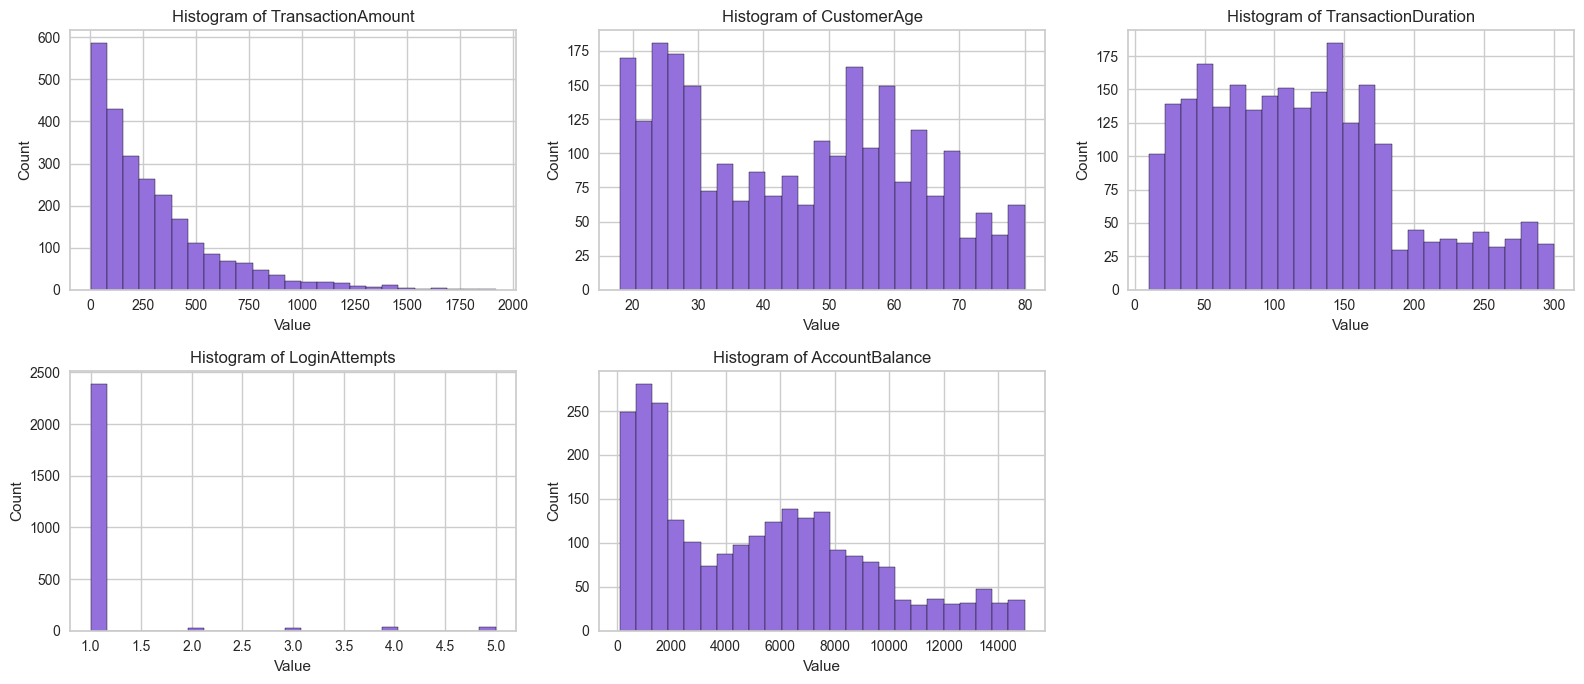

In [8]:
# Visualisasi distribusi dari setiap fitur numerik dalam bentuk histogram
# Menentukan jumlah kolom dan baris plot untuk grid plot histogram
plots_per_row = 3
rows_required = -(-num_numeric // plots_per_row)  # ceiling division agar cukup

# Membuat kanvas subplot
fig, hist_axes = plt.subplots(rows_required, plots_per_row, figsize=(16, rows_required * 3.5))
hist_axes = hist_axes.ravel()  # Diubah ke 1 dimensi agar bisa diakses per index

# Plot histogram untuk masing-masing fitur numerik
for i, column in enumerate(numeric_columns):
    bank_df[column].hist(ax=hist_axes[i], bins=25, color='mediumpurple', edgecolor='black')
    hist_axes[i].set_title(f"Histogram of {column}")
    hist_axes[i].set_xlabel("Value")
    hist_axes[i].set_ylabel("Count")

# Menghapus subplot kosong jika ada sisa slot yang tidak terpakai
for j in range(i + 1, len(hist_axes)):
    fig.delaxes(hist_axes[j])

# Merapikan tata letak keseluruhan
plt.tight_layout()
plt.show()



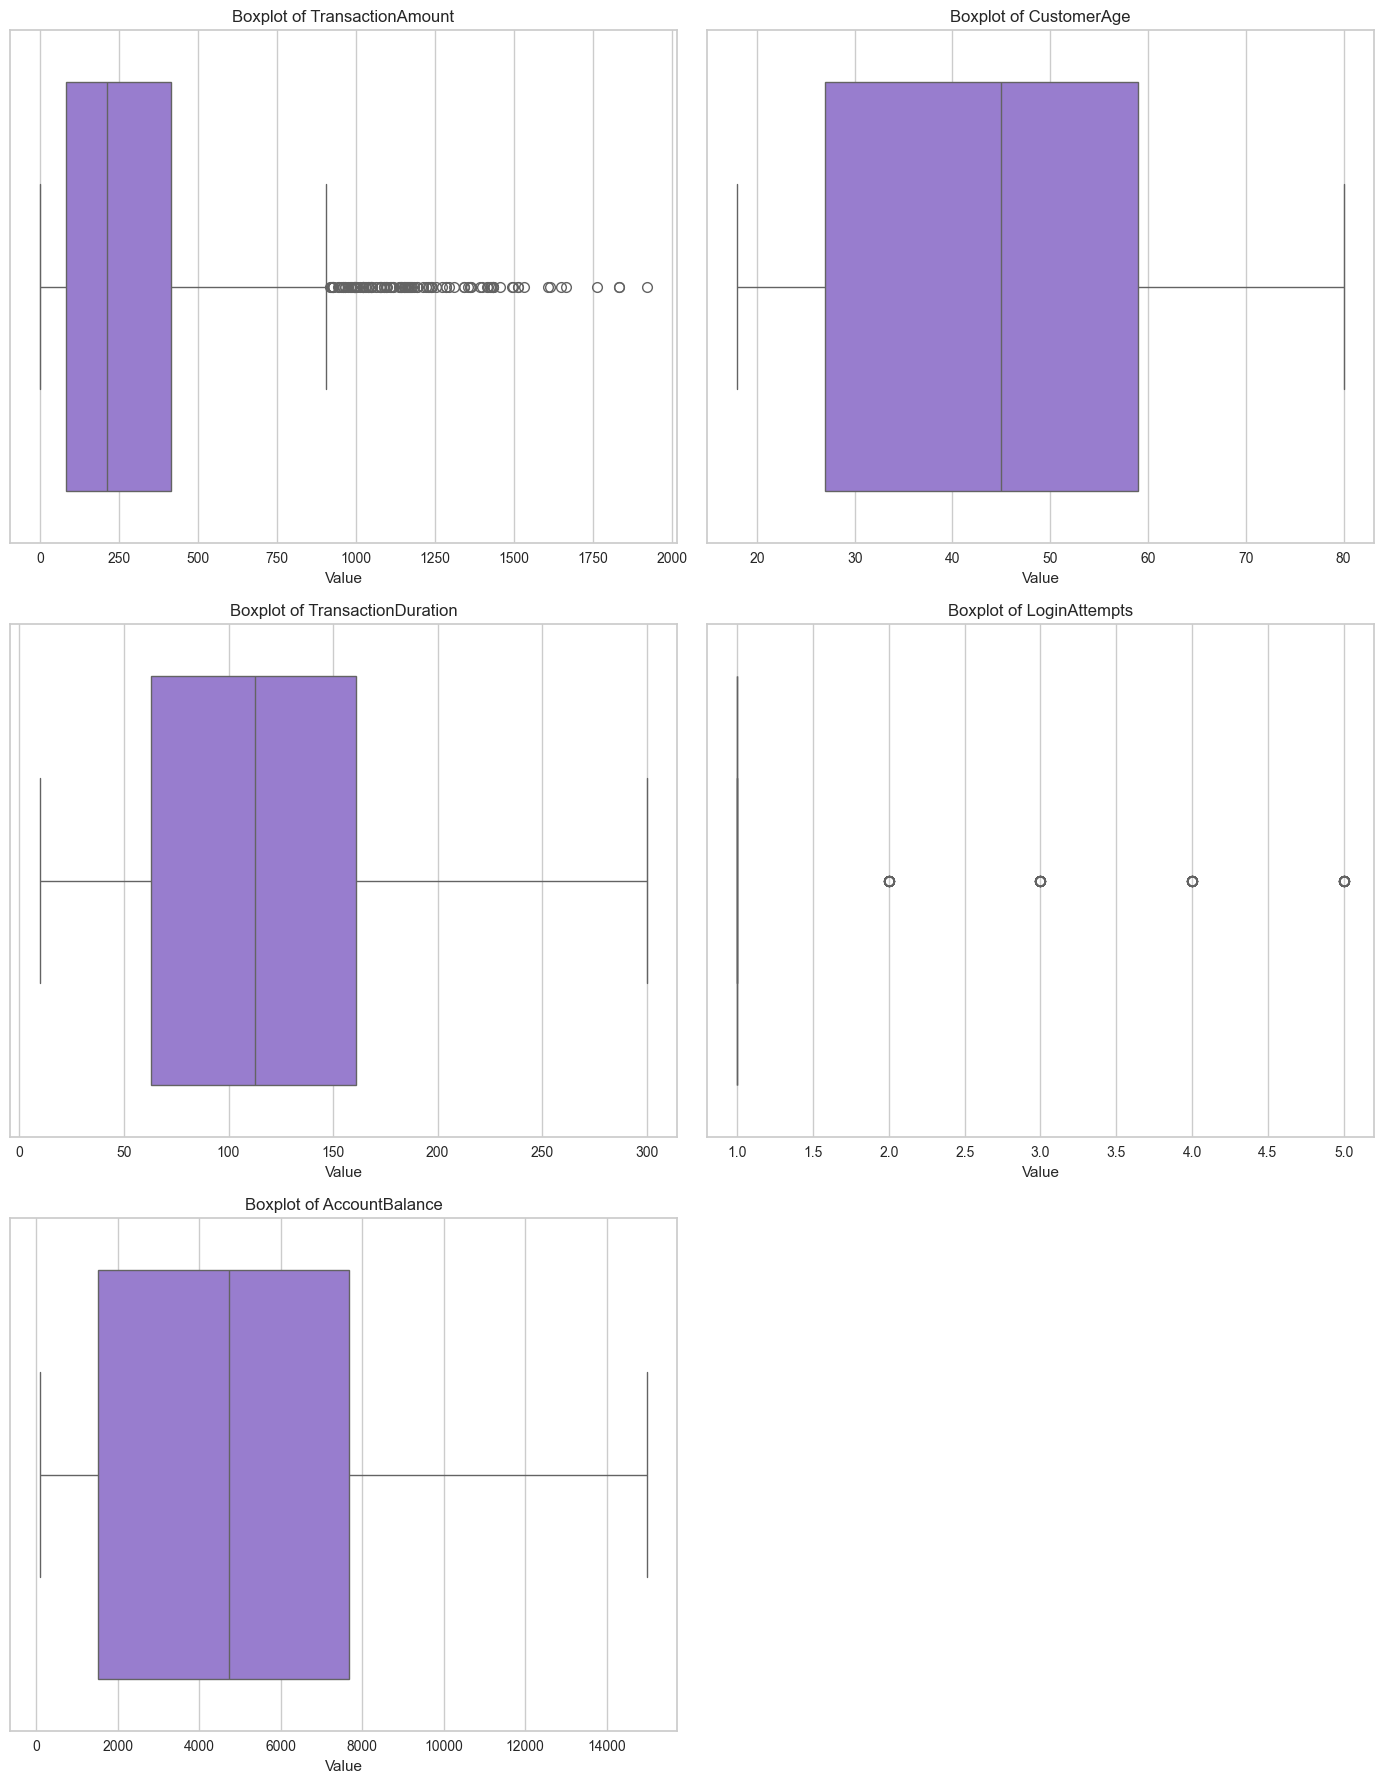

In [9]:
# Visualisasi untuk mendeteksi outlier menggunakan boxplot
# Menentukan jumlah kolom dan baris dalam layout subplot
plots_per_row = 2
rows_required = -(-num_numeric // plots_per_row)  # pembulatan ke atas

# Membuat canvas subplot
fig, box_axes = plt.subplots(rows_required, plots_per_row, figsize=(14, rows_required * 6))
box_axes = box_axes.ravel()  # Jadikan array 1 dimensi agar mudah dipanggil per index

# Membuat boxplot untuk setiap fitur numerik
for i, column in enumerate(numeric_columns):
    sns.boxplot(x=bank_df[column], ax=box_axes[i], color='mediumpurple')
    box_axes[i].set_title(f"Boxplot of {column}")
    box_axes[i].set_xlabel("Value")

# Hapus plot kosong jika jumlah fitur tidak pas dengan grid
for j in range(i + 1, len(box_axes)):
    fig.delaxes(box_axes[j])

# Merapikan tata letak
plt.tight_layout()
plt.show()


Beberapa fitur seperti TransactionAmount dan LoginAttempts menunjukkan keberadaan outlier yang cukup jelas. Nilai ekstrem pada TransactionAmount wajar ditemukan, mengingat perbedaan kebutuhan dan kapasitas transaksi tiap nasabah. Sementara itu, jumlah percobaan login lebih dari sekali pada LoginAttempts juga masih bisa diterima, karena kesalahan input atau retry adalah hal umum dalam sistem autentikasi.

Meskipun secara konteks masih masuk akal, nilai-nilai ekstrim yang terlalu jauh (khususnya pada TransactionAmount) berpotensi memengaruhi hasil clustering dan akan dipertimbangkan untuk penyesuaian di tahap preprocessing.

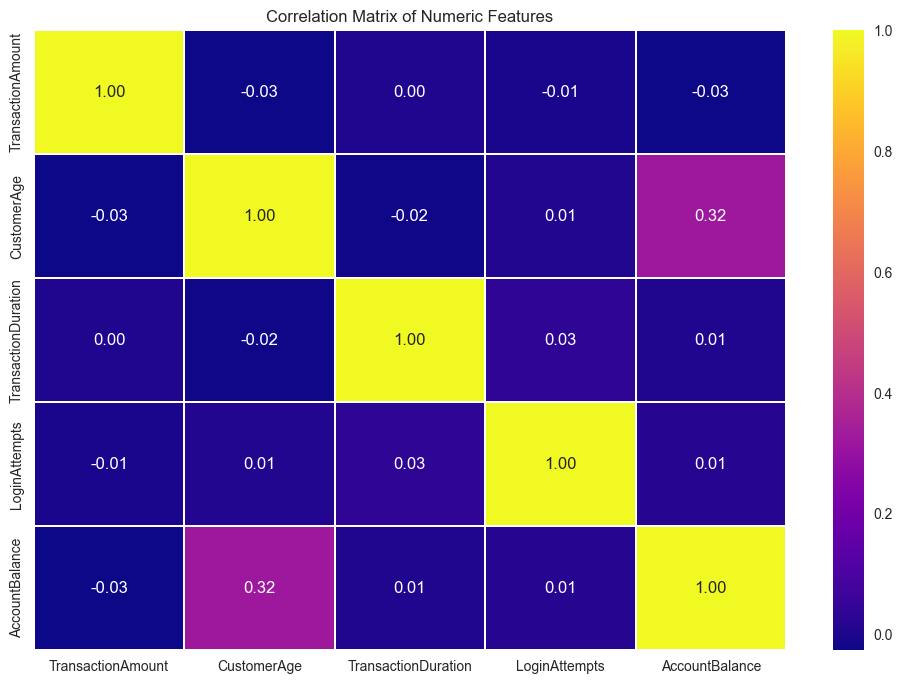

In [10]:
# Visualisasi korelasi antar fitur numerik menggunakan heatmap
# Menghitung korelasi antar fitur numerik
correlation_matrix = bank_df[numeric_columns].corr()

# Menampilkan heatmap dari matriks korelasi
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='plasma', fmt=".2f", linewidths=0.3)
plt.title("Correlation Matrix of Numeric Features")
plt.tight_layout()
plt.show()


Korelasi antar fitur numerik sebagian besar lemah. Hanya CustomerAge dan AccountBalance yang menunjukkan korelasi sedang (0.32), selebihnya saling independen dan cocok untuk clustering.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [12]:
# Identifikasi kolom kategorikal
categorical_columns = bank_df.select_dtypes(include='object').columns

# Menghapus fitur yang bersifat unik atau tidak informatif untuk visualisasi
excluded_columns = ['TransactionID', 'AccountID', 'TransactionDate', 'Location', 
                    'DeviceID', 'IP Address', 'MerchantID', 'PreviousTransactionDate']
categorical_columns = [col for col in categorical_columns if col not in excluded_columns]

# Hitung jumlah kolom kategorikal yang akan divisualisasikan
num_categorical = len(categorical_columns)

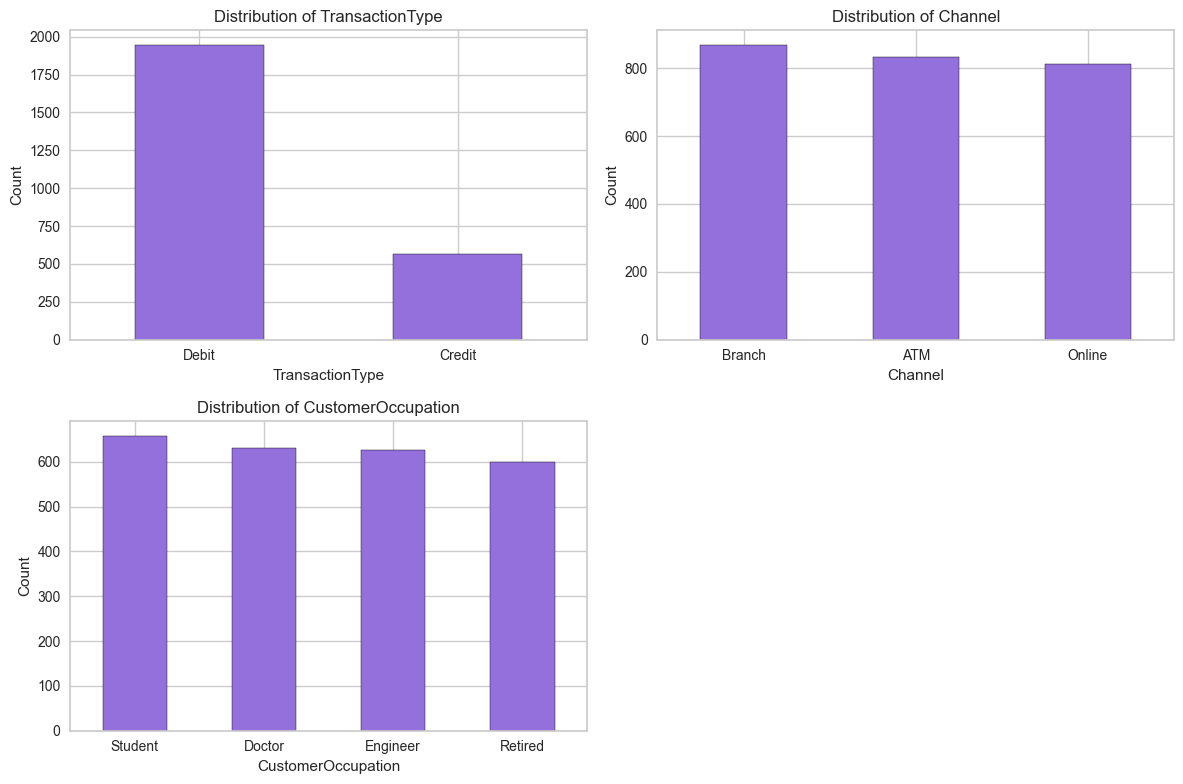

In [ ]:
# Visualisasi distribusi dari setiap fitur kategorikal dalam bentuk diagram batang
# Menentukan jumlah kolom dan baris untuk grid subplot
plots_per_row = 2
rows_required = -(-num_categorical // plots_per_row)

# Membuat canvas subplot
fig, cat_axes = plt.subplots(rows_required, plots_per_row, figsize=(12, rows_required * 4))
cat_axes = cat_axes.ravel()  # Ubah jadi 1 dimensi untuk iterasi lebih mudah  karena bisa diakses per index

# Plot bar chart untuk setiap fitur kategorikal
for i, column in enumerate(categorical_columns):
    bank_df[column].value_counts().plot(kind='bar', ax=cat_axes[i], color='mediumpurple', edgecolor='black')
    cat_axes[i].set_title(f"Distribution of {column}")
    cat_axes[i].set_xlabel(column)
    cat_axes[i].set_ylabel("Count")
    cat_axes[i].tick_params(axis='x', rotation=0)

# Hapus subplot kosong jika jumlah fitur tidak genap
for j in range(i + 1, len(cat_axes)):
    fig.delaxes(cat_axes[j])

# Merapikan tampilan layout
plt.tight_layout()
plt.show()


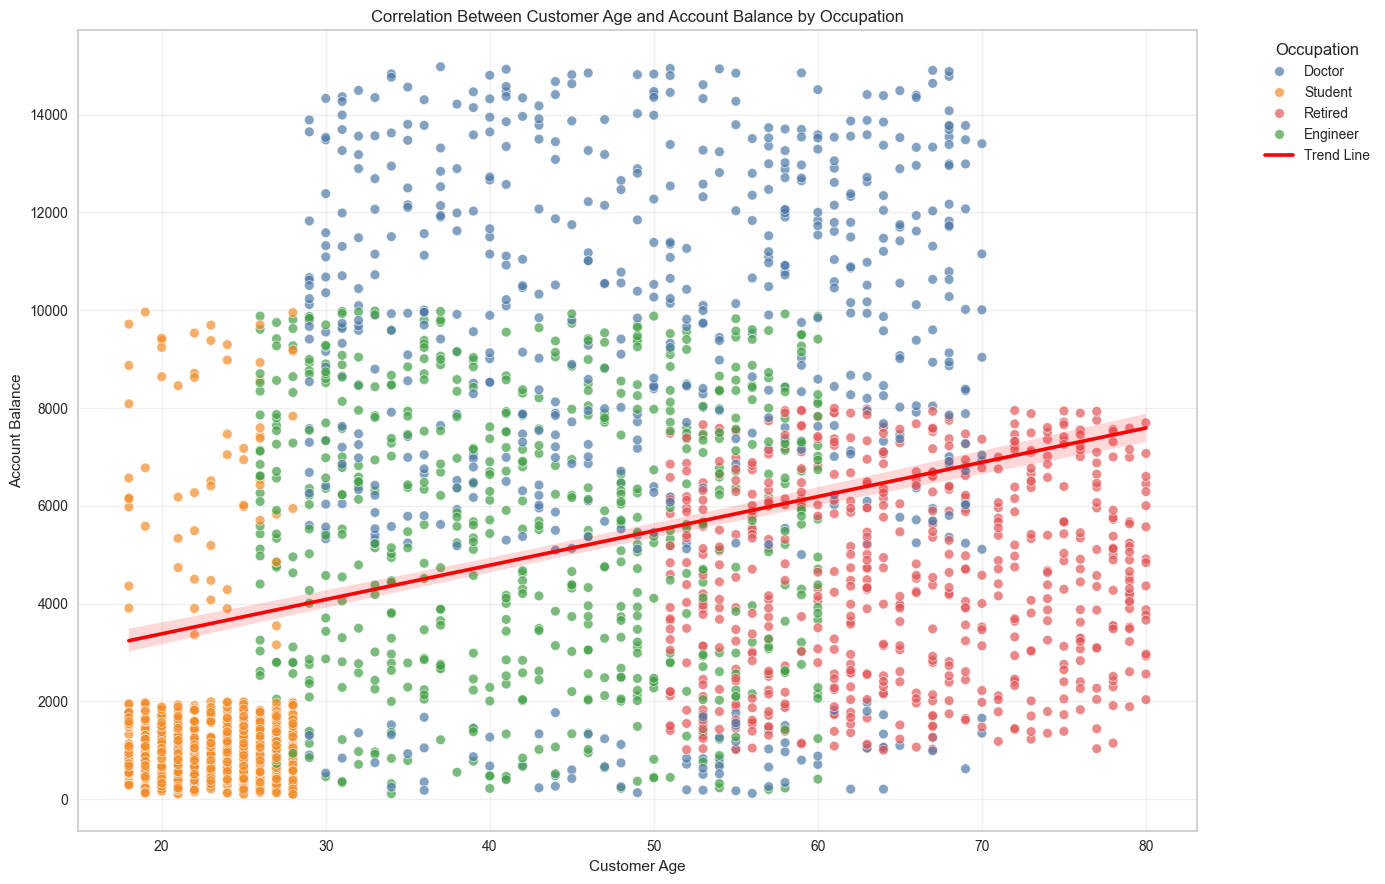

In [36]:
# Visualisasi hubungan antara usia nasabah dan saldo akun, dibedakan berdasarkan jenis pekerjaan menggunakan scatter plot
custom_palette = {
    'Doctor': '#4E79A7',
    'Student': '#F28E2B',
    'Retired': '#E15759', 
    'Engineer': '#43A047'     
}

plt.figure(figsize=(14, 9))
sns.scatterplot(
    data=bank_df,
    x='CustomerAge',
    y='AccountBalance',
    hue='CustomerOccupation',
    palette=custom_palette,
    alpha=0.7
)
sns.regplot(
    data=bank_df,
    x='CustomerAge',
    y='AccountBalance',
    scatter=False,
    color='red',
    label='Trend Line'
)

plt.title('Correlation Between Customer Age and Account Balance by Occupation')
plt.xlabel('Customer Age')
plt.ylabel('Account Balance')
plt.legend(title='Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Scatter plot menunjukkan adanya korelasi positif antara variabel *CustomerAge* (usia pelanggan) dan *AccountBalance* (saldo akun), di mana semakin tinggi usia pelanggan, cenderung semakin besar saldo yang dimiliki. Visualisasi juga memperlihatkan bahwa variabel *CustomerOccupation* (pekerjaan pelanggan) turut memengaruhi distribusi saldo. Pelanggan dengan pekerjaan Doctor umumnya berada pada rentang usia menengah hingga tua dengan saldo tinggi. Sementara itu, kelompok Student didominasi oleh usia muda dengan saldo rendah. Pekerjaan Engineer tersebar di usia produktif dengan saldo yang bervariasi, sedangkan kelompok Retired berada pada usia lanjut dengan saldo cenderung sedang hingga rendah. Perbedaan distribusi ini mengindikasikan bahwa *CustomerOccupation* berpotensi menjadi variabel penting dalam segmentasi pelanggan untuk analisis lebih lanjut.

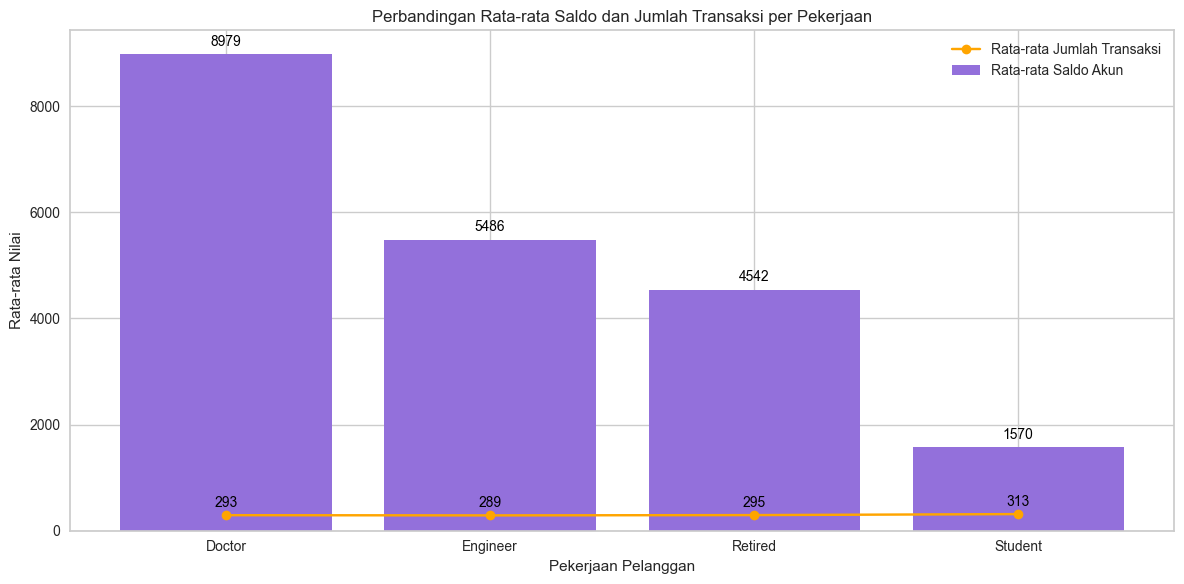

In [ ]:
#Visualisasi Perbandingan Rata-rata Saldo dan Jumlah Transaksi per Pekerjaan
# Hitung rata-rata berdasarkan pekerjaan
occupation_group = bank_df.groupby('CustomerOccupation')
avg_balance = occupation_group['AccountBalance'].mean()
avg_transaction = occupation_group['TransactionAmount'].mean()
occupations = avg_balance.index

# Plot kombinasi bar chart dan line chart dengan label
fig, ax = plt.subplots(figsize=(12, 6))

# Bar chart
bars = ax.bar(occupations, avg_balance, color='mediumpurple', label='Rata-rata Saldo Akun')

# Tambahkan label pada bar chart
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 100, f'{height:.0f}', 
            ha='center', va='bottom', fontsize=10, color='black')

# Line chart
line = ax.plot(occupations, avg_transaction, color='orange', marker='o', label='Rata-rata Jumlah Transaksi')

# Tambahkan label pada titik line chart
for x, y in zip(occupations, avg_transaction):
    ax.text(x, y + 100, f'{y:.0f}', ha='center', va='bottom', fontsize=10, color='black')

# Label dan judul
ax.set_xlabel('Pekerjaan Pelanggan')
ax.set_ylabel('Rata-rata Nilai')
plt.title('Perbandingan Rata-rata Saldo dan Jumlah Transaksi per Pekerjaan')
plt.legend()
plt.tight_layout()
plt.show()

Perbandingan antar profesi menunjukkan bahwa jumlah transaksi cenderung mirip dan tidak terlalu dipengaruhi oleh jenis pekerjaan. Sebaliknya, perbedaan yang lebih jelas terlihat pada saldo akun. Tingginya saldo tidak selalu berbanding lurus dengan frekuensi transaksi, sehingga pelanggan dengan saldo besar belum tentu lebih sering bertransaksi.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [62]:
# Menangani data kosong per kolom
bank_df.isna().sum()


TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

In [66]:
# Menangani data duplikasi
print("Jumlah data duplikasi ", bank_df.duplicated().sum())


Jumlah data duplikasi  0


In [67]:
bank_df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


Berdasarkan hasil statistik deskriptf, dataset ini tidak memiliki nilai kosong maupun duplikat, sehingga tidak memerlukan penanganan missing values atau duplikasi. Hal ini menunjukkan bahwa kualitas data cukup baik dan siap untuk diproses lebih lanjut tanpa perlu pembersihan mendasar.

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
#Type your code here

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [ ]:
#Type your code here

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [ ]:
#Type your code here

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [ ]:
# Type your code here


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [ ]:
# Type your code here

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
# Type your code here

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.